## Data Mining – Spring 2021
## Homework 4: kNN. Linear models. Working with attributes

Rules:

* Homework is rated at 10 points.

* You can use any results found in lectures or seminars during the course without proof, if obtaining these results is not a matter of assignment.

* You can use any free sources with a *mandatory* link to them.

* Plagiarism is not allowed. If cases of cheating are detected, a 0 for the work is awarded to all participants in the violation, even if it is possible to determine who copied from whom.

* Try to make the code as optimal as possible. In particular, the use of loops will be penalized in cases where the operation can be performed using the library tools described in the course.

### Task 1: Visualization of decision surfaces in kNN

In this assignment, we will depict the decision surface for the kNN classifier in order to visually see how the classifier makes decisions for new objects. For simplicity, we will work with the built-in `sklearn` dataset `wine`, which contains information about the characteristics of three types of wine. The description of the set can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and [here](https://rdrr.io/cran/rattle.data/man/wine.html). 

Let's load the dataset and store information about the features in the variable `X`, and about the dependent variable in the variable `y'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge, LinearRegression 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [4]:
np.set_printoptions(suppress = True)                    # уберем scientific notation (так удобнее)

In [5]:
data.data.shape

(178, 13)

## Removing emissions

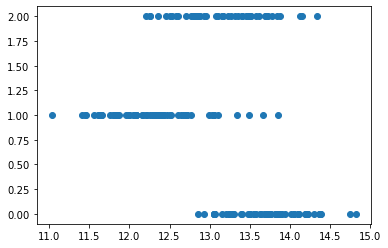

In [6]:
plt.scatter(X['alcohol'], y) # нет выбросов

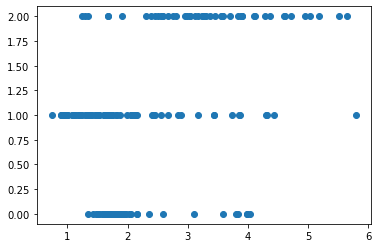

In [7]:
plt.scatter(X['malic_acid'], y) # есть один выброс

In [8]:
X, y = X.drop(X.index[(X['malic_acid'] > 5) & (y == 1)]), np.delete(y, X.index[(X['malic_acid']  > 5) & (y == 1)])

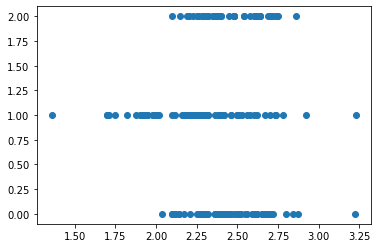

In [9]:
plt.scatter(X['ash'], y) # есть три выброса

In [10]:
X, y = X.drop(X.index[((X['ash'] > 3) | (X['ash'] < 1.5)) & ((y == 1) | (y == 0))]), np.delete(y, X.index[((X['ash'] > 3) | (X['ash'] < 1.5)) & ((y == 1) | (y == 0))])

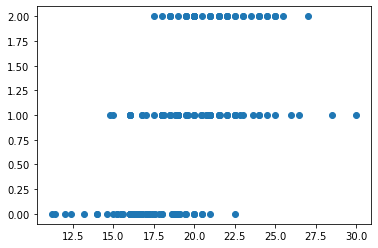

In [11]:
plt.scatter(X['alcalinity_of_ash'], y) # нет выбросов

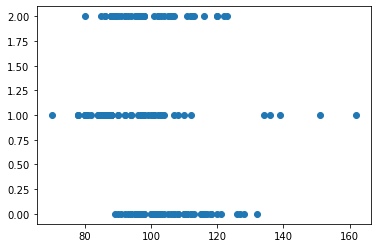

In [12]:
plt.scatter(X['magnesium'], y) # нет выбросов

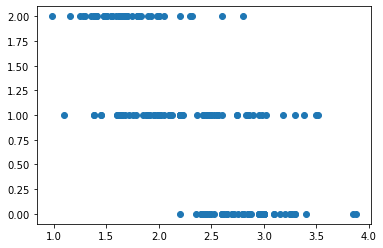

In [13]:
plt.scatter(X['total_phenols'], y) #  нет выбросов

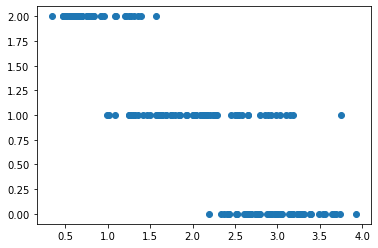

In [14]:
plt.scatter(X['flavanoids'], y) # есть один выброс

In [15]:
X, y = X.drop(X.index[(X['flavanoids'] > 3.5) & (y == 1)]), np.delete(y, X.index[(X['flavanoids']  > 3.5) & (y == 1)])

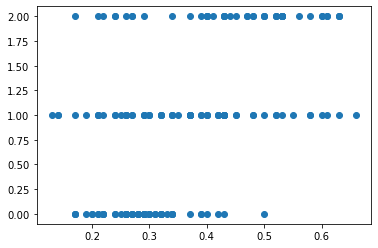

In [16]:
plt.scatter(X['nonflavanoid_phenols'], y) # нет выбросов

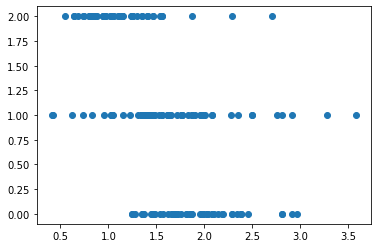

In [17]:
plt.scatter(X['proanthocyanins'], y) # нет выбросов

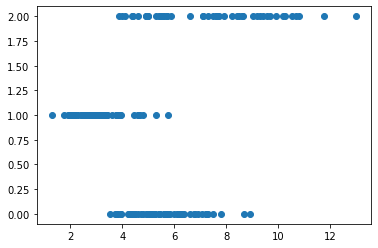

In [18]:
plt.scatter(X['color_intensity'], y) # нет выбросов

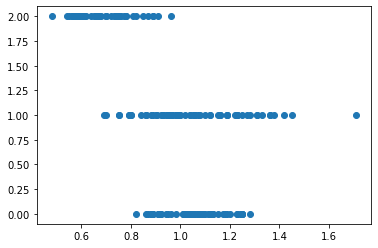

In [19]:
plt.scatter(X['hue'], y) # есть один выброс

In [20]:
X, y = X.drop(X.index[(X['hue'] > 1.6) & (y == 1)]), np.delete(y, X.index[(X['hue']  > 1.6) & (y == 1)])

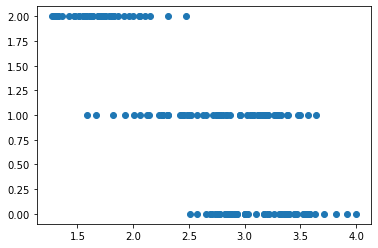

In [21]:
plt.scatter(X['od280/od315_of_diluted_wines'], y) # нет выбросов

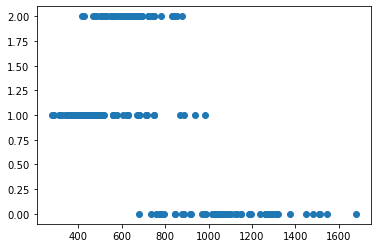

In [22]:
plt.scatter(X['proline'], y) # нет выбросов

**Task 1.1 (0.5 points)** Are there missing values in the dataset? If so, then delete them. Are there categorical variables in the dataset? If so, encode them using One Hot encoding.

In [23]:
X.isnull().sum().sum() # убеждаемся, что нет пропущенных значений

0

In [24]:
pd.isnull(y).sum() # здесь также нет пропущенных значений

0

In [25]:
y # некатегориальная переменная, также как и все остальные (входящие в переменную  X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Task 1.2 (0.5 points)** Using the `train_test_split()` function, divide the sample into a training and a test sample, and set the proportion of the test sample to 0.3. Since the split is random, do not forget to fix `np.random.seed()` for reproducibility of the results.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

**Task 1.3 (1 point)** Train six kNN classifiers on the training sample, differing only in the number of neighbors. For the first classifier, set the number of neighbors to 1, for the second to 3, for the third to 5, for the fourth to 10, for the fifth to 15, and for the sixth to 25 (note the `n_neighbours` parameter of the `kneighborclassifier` class). For training, use only two attributes: `alcohol` and `magnesium' – and the Euclidean distance. Do not forget to scale the features, for example, using the 'Standard Scale r` module.

Print the proportion of correct answers in the training and test samples for each classifier.

In [27]:
X_train_2features = X_train[['alcohol', 'magnesium']]
X_test_2features = X_test[['alcohol', 'magnesium']]

In [28]:
# Отмасштабируем признаки
normalizer = preprocessing.StandardScaler()
X_train_2features_scaled = normalizer.fit_transform(X_train_2features)
X_test_2features_scaled = normalizer.fit_transform(X_test_2features)
X_train_new = pd.DataFrame(data=X_train_2features_scaled, columns=[['alcohol', 'magnesium']])
X_test_new = pd.DataFrame(data=X_test_2features_scaled, columns=[['alcohol', 'magnesium']])

In [29]:
print('NN', '\t', 'Train', '\t', 'Test')
classifiers = []
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_new, y_train)
    classifiers.append(clf) # для следующего задания
    y_train_predicted = clf.predict(X_train_new)
    y_test_predicted = clf.predict(X_test_new)
    accuracy_train = np.mean(y_train_predicted==y_train)
    accuracy_test = np.mean(y_test_predicted==y_test)
    print(f"{k} \t {accuracy_train:.3f} \t {accuracy_test:.3f}")

NN 	 Train 	 Test
1 	 1.000 	 0.596
3 	 0.800 	 0.538
5 	 0.808 	 0.596
10 	 0.783 	 0.654
15 	 0.767 	 0.596
25 	 0.758 	 0.577


**Task 1.4 (0 points)** Install the `mlxtend` library with the command below. The library can also be installed from the terminal using `pip` or `conda`, as indicated [here](http://rasbt.github.io/mlxtend/installation/). 

In [30]:
# !pip install mlxtend

If everything was successful, then in the output of the command above you will see a message like "successfully installed", and the next cell will run without errors.

In [31]:
import mlxtend

**Task 1.5 (1 point)**  
The `mlxtend` library allows for easy visualization of decision boundaries for trained classifiers.  
Study the [documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) of the library and find out how to plot multiple decision region graphs on a grid.  
Create such a grid of plots for the classifiers trained earlier.  

### **Hints:**
1. You can use the provided code from the documentation and adapt it for our case.  
2. You may need additional libraries used in the example from the documentation.  
3. Pay attention to how the parameters of `gridspec.GridSpec()` and `itertools.product()` need to be adjusted for our number of classifiers.  
4. In the `plot_decision_region()` function, use `y_train` and the relevant columns from `X_train`. You may need to convert them into a NumPy array.  
5. If you store the trained classifiers in a list in Task 1.3, you won’t need to train them again.  
6. Plotting the graph may take some time—be patient!  

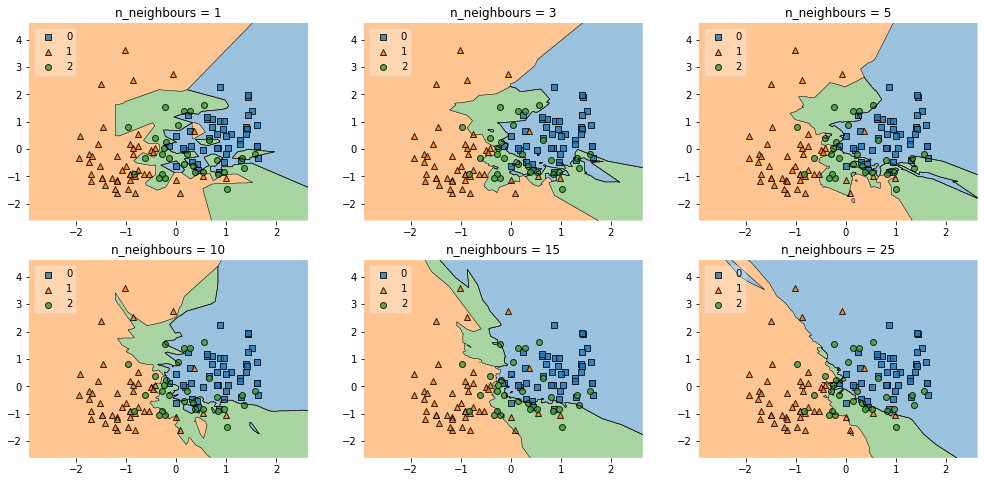

In [32]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(17,8))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15',
          'n_neighbours = 25']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_new.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Task 1.6 (0.5 points)** Please comment on the results obtained in tasks 1.3 and 1.5. What is the optimal number of neighbors to use for classifier training? Explain your choice by describing the geometry of the data and the resulting decision surface.

Considering the results of task 1.3, we can say that the optimal number of neighbors is 10, since with a given number of neighbors, the highest score was achieved.
However, we must not forget that not all possible options have been considered, in particular, 2, 3, 4, etc., therefore, 10 neighbors is the best option among the selected ones, and not in general. 
The picture also shows that at k=10, there is no overfitting, while all objects are more or less accurately separated.

### Task 2: A trained machine

In this assignment, we will look at a simplified idea of how the nearest neighbor method can be applied to simulate robot movement. 

Let's consider a robot on a discrete two-dimensional plane that can move one position to the right, left, up or down at any given moment in discrete time. There are labels of one of the four classes scattered on the plane, analyzing which the robot can (but does not have to) adjust your movement. Let the labels of class 0 correspond to the signal to move to the right, the labels of class 1 correspond to the left, class 2 correspond to the up, class 3 correspond to the down. 

The robot moves according to the following rule: with a probability of 0.2, the robot will move to the right, and with a probability of 0.8, it will evaluate which class labels predominate among its `k` nearest neighbors, and move in the direction of this dominant class. 

For a better understanding of what is happening, let's depict the possible position of the robot and the tags.

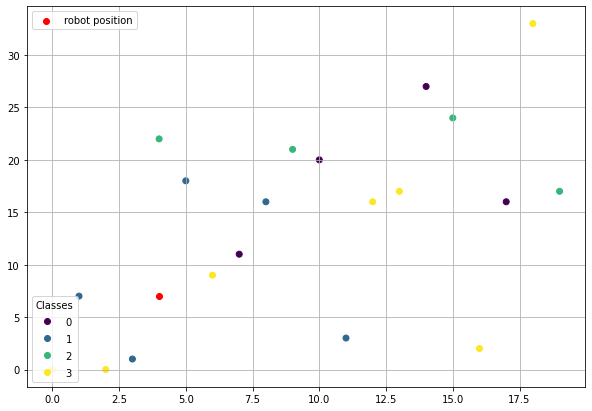

In [33]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

In the next step, the robot will move 1 either to the right or in the direction indicated by the nearest neighbors.

**Task 2.1 (1.5 points)** Implement a class that defines the described robot behavior using the template below:
1. Define the attributes `trajectory` (a variable for storing the robot's movement history as a sequence of points with two coordinates) and `knn` (a trained kNN classifier that predicts its class based on the position of the label).
2. Define the `move()` method: calculate the new position of the work according to the rules above and add it to the movement history. Hint: The outcomes can be interpreted as the results of a coin flip with an eagle probability of 0.2. To simulate such a flip, you can use, for example, `np.random.binomial()` with the correct parameters.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1, -1)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        a = np.random.binomial(1, 0.2)
        if a == 1:
            self.trajectory = np.vstack((self.trajectory, [self.trajectory[-1] + self.mapping[0]]))
        else:
            self.trajectory = np.vstack((self.trajectory, [self.trajectory[-1] + 
                                                           self.mapping[self.knn.predict([self.trajectory[-1]])[0]]]))

**Task 2.2 (0.5 points)** Add the `conduct_experiment` function: define the `traj` variable so that it contains the robot's movement history in the form of a two-dimensional numpy array in which the columns correspond to the x and y coordinates of the corresponding position.

In [36]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')
    
    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

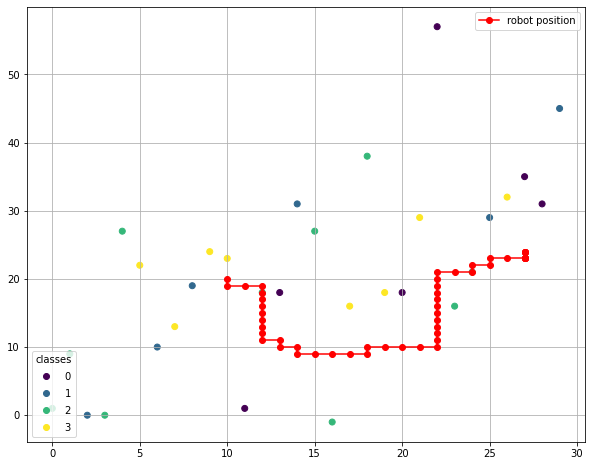

In [37]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Task 2.3 (1 point)** How does the number of neighbors affect the trajectory of the robot in our experiment? Build four graphs with a different number of neighbors of your choice. But what would happen if classes were assigned to labels not randomly, but meaningfully?

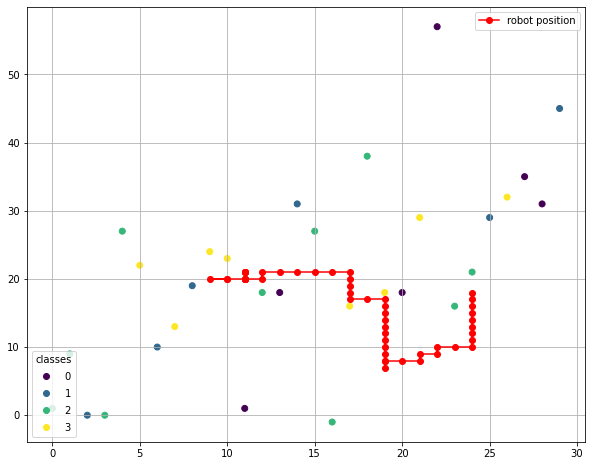

In [38]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

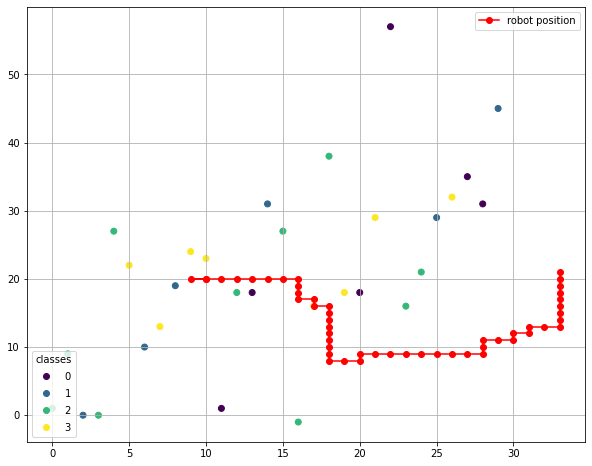

In [39]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

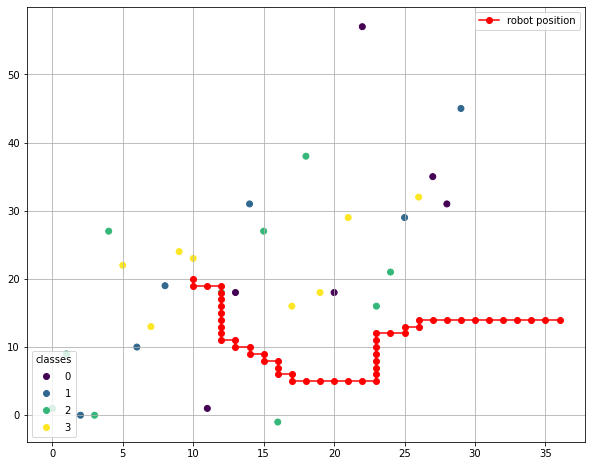

In [40]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 7, n_movements = 50)

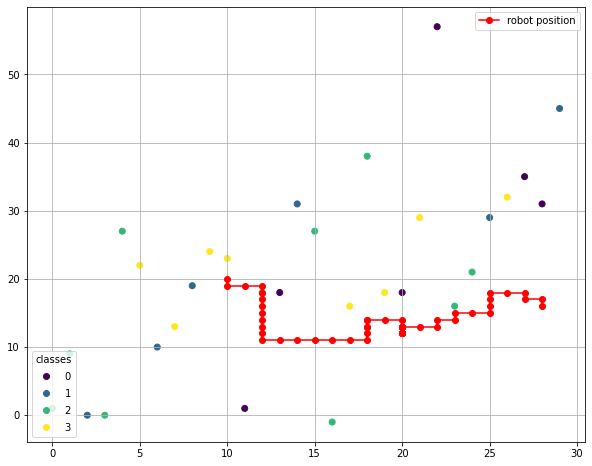

In [41]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

In any case, the movement to the right is likely to dominate, regardless of the number of neighbors due to the task condition,
however, as the parameter increases, the orientation of the robot's movement becomes more noticeable in accordance with which points dominate. 
on the map as a whole (especially on the right side). So, at k = 10, only the movements to the right and down strongly dominate, which is apparently due to the dominance of yellow dots on the map. For example, if we had meaningfully selected relatively many Class 3 placemarks on the right side of the map or on the map as a whole, the robot would constantly move up and to the right.

With small k, we could control the trajectory of the robot's movement by placing dots of the desired color near it, as well as in the direction where the robot moves when they dominate.

### Task 3: Linear regression

In this assignment, we will look at various aspects of building a linear model. We will be working with one of the classic statistical datasets containing information about diamonds. The description can be viewed [here](https://www.kaggle.com/shivam2503/diamonds).

In [42]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
data.shape

(53940, 11)

We will solve the problem of predicting the price of a diamond `price` depending on its characteristics.

**Task 3.1 (0.1 points)** Are there missing values in the dataset? If so, delete them.

In [44]:
data.isnull().sum().sum() # нет пропущенных значений

0

**Task 3.2 (0.1 points)** Are there meaningless columns in the dataset (features that do not carry additional information)? If so, then delete them.

In [45]:
data = data.drop(['Unnamed: 0'], axis=1)

**Task 3.3 (0.1 points)** Linear regression is based on the assumption of a linear relationship between features and the target variable, and therefore, before selecting variables to include in the model, it makes sense to check to what extent this relationship holds. For the following points, we will also need sample correlations between the features. Print a matrix of sample correlations between all the real features and the target variable (that is, there will be a $k+1$ row in this matrix, where $k$ is the number of real features).

Which physical features correlate most with the target variable?

In [46]:
# больше всего с целевой переменной коррелирует "carat", однако размеры бриллианта "x", "y" и "z" такжже показывают высокую корреляцию
pd.DataFrame(data=data.corrwith(data["price"]), columns=['price'])

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


**Task 3.4 (0.1 points)** Since the linear model adds feature values with some weights, we need to carefully process the categorical features. Encode categorical variables using One Hot encoding.

In [47]:
data_new = data.drop(['cut', 'color', 'clarity'], axis=1).join(pd.get_dummies(data[['cut', 'color', 'clarity']], drop_first=True))
data_new

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Task 3.5 (0.2 points)** Divide the sample into a training sample and a test sample. Specify the percentage of the test sample equal to 0.3.

In [48]:
X = data_new.drop('price', axis=1)
y = data_new['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=10)

**Task 3.6 (0.3 points)** Often, when using linear models, the real features are scaled. At the same time, coefficient estimates lose their direct statistical interpretation ("as $X_1$ increases by 1, $y$ increases by $w_1$"), but acquire properties useful in machine learning tasks. In this task, scale the physical features of the training and test samples using the `StandardScaler` module.

In [50]:
normalizer_X = preprocessing.StandardScaler()
scaler_X = normalizer_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
X_train_new = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_new = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [51]:
normalizer_y = preprocessing.StandardScaler()
scaler_y = normalizer_y.fit(pd.DataFrame(data=y_train))
y_train_new = scaler_y.transform(pd.DataFrame(data=y_train))
y_test_new = scaler_y.transform(pd.DataFrame(data=y_test))

**Task 3.7 (0.2 points)** Evaluate the linear regression in the training sample. Print the root-mean-square error on the training and test samples.

In [52]:
linreg = LinearRegression()
linreg_fitted = linreg.fit(X_train_new, y_train_new)
y_predicted_train = linreg_fitted.predict(X_train_new)
y_predicted_test = linreg_fitted.predict(X_test_new)

In [53]:
mse_linreg_train = mean_squared_error(y_predicted_train, y_train_new)
mse_linreg_test = mean_squared_error(y_predicted_test, y_test_new)
print(mse_linreg_train) 
print(mse_linreg_test)

0.08072887349955489
0.08293550667062285


**Task 3.8 (0.2 points)** Study the documentation of the `Linear Regression` module and output the obtained coefficient estimates. Name the real variables whose coefficient estimates are modulo an order of magnitude higher than the estimates of other real variables.

In [54]:
linreg_fitted.coef_ 

array([[ 1.32907746, -0.01844427, -0.01705106, -0.24193373,  0.02034944,
        -0.06005157,  0.04544907,  0.10640311,  0.08715261,  0.08056027,
        -0.01990847, -0.02584408, -0.04814493, -0.08811503, -0.10896945,
        -0.12957819,  0.24360725,  0.40028242,  0.26048845,  0.41658387,
         0.45616071,  0.32150512,  0.36665254]])

The "carat" attribute has the highest values (unsurprisingly, because it has the highest correlation with the target variable). The "x" feature (the length of the diamond) and the last seven (that is, the values of those features associated with "clarity") also have high modulus values.

**Task 3.9 (0.4 points)**  
As observed from the correlation matrix analysis in Task 3.3, some features exhibit strong correlations, which may indicate the problem of *multicollinearity*. The differences in the order of coefficients identified in the previous task also hint at its presence.  
As is well known, this issue can be addressed either by excluding certain features from the model or by applying regularization. We will opt for the second approach.  

Regularization works by modifying the loss function to eliminate problems arising from multicollinearity.  

With **L1 regularization**, the objective is to minimize the following loss function:  

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$  

This model is called **Lasso regression**.  

With **L2 regularization**, the objective is to minimize the following loss function:  

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$  

This model is called **Ridge regression**.  

Train both **Lasso regression** and **Ridge regression**, setting the regularization hyperparameter to 10.  
Use the `Lasso` and `Ridge` modules from `sklearn`.  

- How significantly do the weights decrease?  
- Draw conclusions about the severity of multicollinearity in the original regression model.  


In [55]:
lasso = Lasso(alpha=10)
ridge = Ridge(alpha=10)
lasso_fitted = lasso.fit(X_train_new, y_train_new)
ridge_fitted = ridge.fit(X_train_new, y_train_new)
print(lasso_fitted.coef_) # коэффициеты обнулились, а, значит, гиперпараметр регуляризации слишком велик

[ 0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.
  0. -0. -0. -0. -0.]


In [56]:
print(ridge_fitted.coef_) # в целом, веса изменились несильно, 
                          # поэтому в изначальной регрессии проблема мультиколлинеарности сильно себя не проявляла 

[[ 1.31989192 -0.01784533 -0.01708596 -0.22871636  0.01813747 -0.06240007
   0.0456095   0.10672856  0.08737562  0.08093716 -0.01980464 -0.02579923
  -0.04800375 -0.08789306 -0.10865011 -0.12924012  0.24030716  0.39227032
   0.25364357  0.40990178  0.44835437  0.31688353  0.36126655]]


**Task 3.10 (0.4 points)**  
As discussed in the seminars, **Lasso regression** can be used for selecting the most informative features.  

For the following values of the regularization parameter $\alpha$: **0.1, 1, 10, 100, 200**, train both **Lasso** and **Ridge regressions**, then plot the change in the **Euclidean norm** of the weights (`np.linalg.norm()` of the coefficient vector) as a function of $\alpha$.  

Since the norm is a numerical characteristic of the vector's magnitude, analyzing it helps determine how large the coefficient estimates are.  

- **Which method reduces weights more aggressively?**  
- **Explain why Lasso regression is commonly used for feature selection.**  


In [57]:
lasso_norms = []
ridge_norms = []
alphas = [0.1, 1, 10, 100, 200]
for i in alphas:
    lasso_another_one = Lasso(alpha=i)
    ridge_another_one = Ridge(alpha=i)
    lasso_another_one_fitted = lasso_another_one.fit(X_train, y_train)
    ridge_another_one_fitted = ridge_another_one.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso_another_one_fitted.coef_))
    ridge_norms.append(np.linalg.norm(ridge_another_one_fitted.coef_))

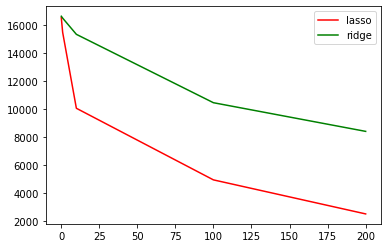

In [58]:
plt.plot(alphas, lasso_norms, color='r', label='lasso')
plt.plot(alphas, ridge_norms, color='g', label='ridge')
plt.legend()
plt.show()

Thus, Lasso regression reduces the weights more aggressively, which is not surprising, because it uses L1 regularization, which weighs errors by their absolute value.

It is precisely the tendency of Lasso regression to omit unimportant features that allows it to be frequently used for their selection.

**Task 3.11 (0.5 points)**  
Depending on the value of the regularization parameter $\alpha$ in **Lasso regression**, different coefficient estimates become zero. The optimal $\alpha$ can be selected using **cross-validation** on the training dataset.  

To perform cross-validation, use the **`LassoCV`** module. This module accepts a list of $\alpha$ values (parameter `alphas`) and conducts cross-validation for each value, storing the **Mean Squared Error (MSE)** for each fold (the number of folds is set using the `cv` parameter). The result is stored in an **error matrix** of size `len(alphas) × cv`. After training, this matrix can be accessed via the `.mse_path_` attribute.  

Note that the model may reorder the provided $\alpha$ values—use the `.alphas_` attribute to determine the correct order.  

- Set the number of cross-validation folds (`cv`) to **5**.  
- Compute the **average MSE** for each $\alpha$ value (i.e., average across rows of the error matrix).  
- **Select the $\alpha$ value that minimizes the MSE**, indicating the best model performance.  


In [59]:
lassocv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)
lassocv_fitted = lassocv.fit(X_train_new, y_train_new)

In [60]:
lassocv_fitted.alphas_

array([200. , 100. ,  10. ,   1. ,   0.1])

In [61]:
mse_all = lassocv_fitted.mse_path_

In [62]:
mean_all = np.mean(mse_all, axis=1)

In [63]:
mse_mean_best = min(mean_all)
mse_mean_best

0.1610809308731172

**Task 3.12 (0.5 points)** Train the final Lasso regression with the selected parameter $\alpha$ on the training sample. Print out the coefficients obtained and comment on which signs turned out to be uninformative and which ones were the most informative. Please provide a possible semantic explanation for this result.

In [64]:
lasso_final = Lasso(alpha=mse_mean_best)
lasso_final_fitted = lasso_final.fit(X_train_new, y_train_new)
lasso_final_fitted.coef_

array([ 0.76029363, -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

It can be seen that the most informative feature is the 'carat'. The rest of the signs were ignored by the model.

**Task 3.13 (0.4 points)** Make predictions of the trained Lasso regression on a test sample and compare the root-mean-square error with the error of the usual linear regression from task 3.7. Which model is better to use for predictions? Please provide a possible explanation for why one model turned out to be better than the other.

In [65]:
y_predicted_lasso_final = lasso_final_fitted.predict(X_test_new)
print(mean_squared_error(y_predicted_lasso_final, y_test_new))

0.18404362457278484


In [66]:
print(mse_linreg_test) # ошибка линейной регрессии из 3.7

0.08293550667062285


Thus, Lasso regression coped with the task better. Apparently, this model performed better, since there are a significant number of rather uninformative features in the task.